# PADS Dataset Exploratory Data Analysis


In [1]:
import os
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

## Estructura del set de datos y contenidos

El dataset PADS (Parkinson's Disease Smartwatch) esta organizado en tres carpetas: "patients", "questionnarie" y "movement". A continuacion, definimos que se incluye en cada una de estas carpetas:

### Patients

La carpeta Patients, cuenta con *metadata* de cada participante. Aqui pueden observarse datos demograficos e informacion clinica. Por ejemplo, su condicion de diagnostico (PD, HC, o DD), comentarios sobre su enfermedad, su edad al ser diagnosticado, su edad actual, su altura, peso, genero, si es diestro o zurdo, su historial familar (si alguien en su familia tuvo Parkinson) y otros detalles.

### Questionnaire

En esta carpeta, para cada uno de los pacientes se tiene un cuestionario. Este cuestionario tiene respuestas de Si/No y consiste de un set de preguntas estandarizado, el "Parkinson's disease non-motor symtpoms questionnaire (PDNMS). Cada cuestionario con sus respectivas respuestas se almacena en un archivo *json*. En cada uno se tienen 30 preguntas.

### Movements

Esta carpeta cuenta con datos de los sensores de los *smartwatch* utilizados en las pruebas motrices que realizo cada paciente. Para cada uno de ellos, se tiene un archivo *json* que cuenta con informacion sobre los movimientos que realizo, en donde se define cierta *metadata* importante, como que prueba se estaba llevando a cabo, cual era la mano (izquierda o derecha), cuales eran los canales (tiempo, acelerometro, giroscopio) y el archivo correspondiente donde se encuentra la informacion.

Lo importante, es comprender que se tienen dos archivos de texto (uno para cada brazo) para cada paciente para cada prueba motriz. Esto nos brinda un total de 11 (TODO: Chequear que esten todos los timeseries) archivos por paciente. Las pruebas motrices son varias, pero algunas de ellas son reposo, levantar los brazos, sostener un peso, tomar de un vaso, etc.

The PADS (Parkinson’s Disease Smartwatch) dataset is organized into three primary folders, each containing a specific modality of data for 469 participants​

# Analisis Exploratorio de Datos - Datos demograficos y clinicos

El dataset incluye 469 participantes (originalmente 504, pero algunos fueron removidos por calidad de datos). Los participantes se encuentran divididos en tres categorias:

- Parkinson's Disease (PD)
- Differential Diagnosis (DD)
- Healthy Controls (HC)

En el caso de PD, se tienen 276 individuos (195 hombres, 81 mujeres), con una media de 65.4 (desvio estandar de 9.6). Para esta clase, la edad promedio del diagnostico de Parkinson's es de 58.3 años. Por lo tanto en promedio se tienen aproximadamente 7 anios desde la fecha de diagnostico de la enfermedad.

Este grupo es predominantemente hombre (aproximadamente un 70%), que refleja la conocida prevalencia de esta enfermedad en hombres.
Finalmente la altura y pesomedio fueron de 175.7cm y 83.8 kg respectivamente.

En el caso de HC, se tienen 79 individuos (29 hombres, 50 mujeres), con una media de edad de 62.9 años (desvio estandar de 12.5). Esta clase tiene mas mujeres y no tiene diagnostico neurologico (es decir, se encuentran saludables). Esta clase es la clase "control", la que nos sirve para poder comparar. 
La altura y peso medio 170.5 cm y 78.8kg es menor al caso de PD, lo que es esperable dado que se tienen mas mujeres.

Finalmente, en el caso de DD, se tienen 144 individuos (57 hombres, 57 mujeres) que tienen otros desordenes de movimiento similares a PD. La edad media de este grupo es de 62.4 años (desvio estandar de 11.5). Esta categoria incluye subcategorias, en donde se tienen:
- Essential Tremor (ET): 28 casos
- Atypical Pariknsonism syndromes: 15 casos
- Multiple Sclerosis with tremor: 11 casos
- Miscellaneous diagnoses: 60 casos

Comparaciones entre clases:
Podemos comparar estos datos entre clases para poder entender sus principales diferencias:
- Tanto HC, PD y DD tienen un notable *overlap* en la distribucion de edades de los pacientes.
- Los pacientes con ET suelen tener una menor edad de aparicion de sintomas que los pacientes con PD.
- La media de altura y peso de DD se encuentra entre PD y HC. Se nota que las variaciones en la distribucion de genero en cada clase, se correlaciona con estos datos

En general, se tiene una distribucion de edad bastante similar para cada clase, algo que buscaron los autores del set de datos.

Valores únicos en 'condition' antes de mapear:
["Parkinson's" 'Healthy' 'Essential Tremor' 'Other Movement Disorders'
 'Atypical Parkinsonism' 'Multiple Sclerosis']

Grupos de diagnostico tras mapear:
['PD' 'HC' 'DD']

Resumen de datos demográficos y clínicos por grupo:
+-------------+---------+------------+-----------+--------------+-----------+-----------+------------------+--------------------+------------------+--------------------+------------------+-----------------------+
| diagnosis   |   Count |   Mean_Age |   Std_Age |   Median_Age |   Min_Age |   Max_Age |   Mean_Height_cm |   Median_Height_cm |   Mean_Weight_kg |   Median_Weight_kg |   Mean_Age_at_Dx |   Mean_Years_Since_Dx |
|-------------+---------+------------+-----------+--------------+-----------+-----------+------------------+--------------------+------------------+--------------------+------------------+-----------------------|
| DD          |     114 |       62.4 |      11.5 |           63 |        40 |        85 | 

<Figure size 800x600 with 0 Axes>

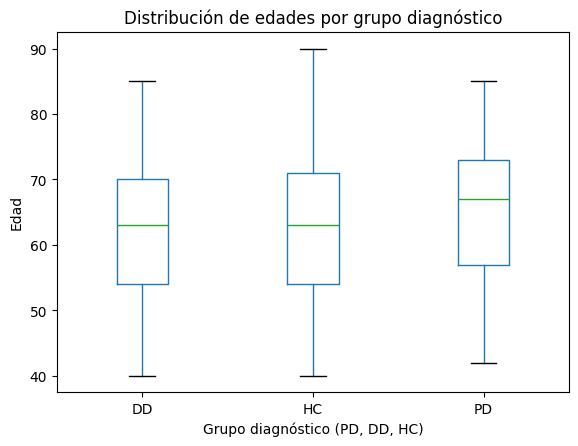

In [2]:
patients_folder = "../../data/patients"
patient_files = glob.glob(os.path.join(patients_folder, "patient_*.json"))

patients_data = []
for file in patient_files:
    with open(file, 'r') as f:
        patient = json.load(f)
        patients_data.append(patient)

# Patients data DF
df_patients = pd.DataFrame(patients_data)

print("Valores únicos en 'condition' antes de mapear:")
print(df_patients['condition'].unique())

# --------------------------
# Map conditions to labels
# --------------------------
def map_condition(cond):
    cond_lower = cond.lower()
    if cond_lower in ['healthy']:
        return 'HC'
    elif cond_lower in ["parkinson's"]:
        return 'PD'
    else:
        return 'DD'

df_patients['diagnosis'] = df_patients['condition'].apply(map_condition)

print("\nGrupos de diagnostico tras mapear:")
print(df_patients['diagnosis'].unique())

# --------------------------
# Years since diagnostic
# --------------------------
df_patients['years_since_dx'] = df_patients['age'] - df_patients['age_at_diagnosis']

# --------------------------
# General summary
# --------------------------
summary_stats = df_patients.groupby('diagnosis').agg(
    Count=('id', 'count'),
    Mean_Age=('age', 'mean'),
    Std_Age=('age', 'std'),
    Median_Age=('age', 'median'),
    Min_Age=('age', 'min'),
    Max_Age=('age', 'max'),
    Mean_Height_cm=('height', 'mean'),
    Median_Height_cm=('height', 'median'),
    Mean_Weight_kg=('weight', 'mean'),
    Median_Weight_kg=('weight', 'median'),
    Mean_Age_at_Dx=('age_at_diagnosis', 'mean'),
    Mean_Years_Since_Dx=('years_since_dx', 'mean')
).round(1)

print("\nResumen de datos demográficos y clínicos por grupo:")
print(tabulate(summary_stats, headers="keys", tablefmt="psql"))

# --------------------------
# Get gender distribution
# --------------------------
gender_distribution = df_patients.groupby(['diagnosis', 'gender']).size().unstack(fill_value=0)
print("\nDistribución de género por grupo:")
print(tabulate(gender_distribution, headers="keys", tablefmt="psql"))

# --------------------------
# Extract subcategories for DD
# --------------------------
def extract_dd_subcategory(row):
    if row['diagnosis'] != 'DD':
        return None
    comment = row.get('disease_comment', '').lower()
    # Si no hay comentario significativo, se asume "Miscellaneous"
    if comment.strip() == "-" or comment.strip() == "":
        return "Miscellaneous"
    if "essential" in comment:
        return "ET"
    elif "atypical" in comment:
        return "Atypical"
    elif "multiple sclerosis" in comment or "ms" in comment:
        return "MS"
    else:
        return "Miscellaneous"

# Apply subcategory extraction
df_patients.loc[df_patients['diagnosis'] == 'DD', 'dd_subcat'] = df_patients[df_patients['diagnosis'] == 'DD'].apply(extract_dd_subcategory, axis=1)

# Count subcategories
dd_subcat_counts = df_patients[df_patients['diagnosis'] == 'DD'].groupby('dd_subcat').size().reset_index(name='Count')
print("\nSubcategorías en el grupo DD:")
print(tabulate(dd_subcat_counts, headers="keys", tablefmt="psql"))

# --------------------------
# Plot boxplot for age distribution
# --------------------------
plt.figure(figsize=(8, 6))
df_patients.boxplot(column='age', by='diagnosis', grid=False)
plt.title("Distribución de edades por grupo diagnóstico")
plt.suptitle("")  # Remover título automático
plt.xlabel("Grupo diagnóstico (PD, DD, HC)")
plt.ylabel("Edad")
plt.show()

# Analisis Exploratorio de Datos - Datos de cuestionarios

En cada cuestionario, los pacientes contestaron 30 preguntas con respuesta SI/NO sobre sintomas "no-motrices" comunes en la enfermdeda de Parkinson. Estas preguntas cubren un rango de sintomas diverso:

- Psiquiatrico: Alucinaciones, depresion, ansiedad, apatia 
- Fatiga: Insomnia, sueños lucidos, entre otros
- Autonomicos: Constipacion, urgencia urinaria, entre otros
- Sensoriales: Perdida de olfato o gusto, dolor, entre otros
- Otros

Este cuestionario se basa en el cuestionario PDNMS que detallamos anteriormente. Lo que nos interesa para nuestro caso de uso, es verificar que existe una correlacion entre las respuestas del cuestionario y las clases PD, DD y HC. Esto es debido a que si la correlacion existe, entonces es probable que un modelo de *machine learning* pueda comprender dicha correlacion para poder inferir en base a un cuestionario, cual es la clase a la que pertenece un paciente.

Lo que se encontro, es que es raro que un paciente con PD no reporte multiples sintomas no motores, es mas, en general, los pacientes de esta clase suelen responder si a 8-12 de estos sintomas en promedio.

Esto se contrasta con los pacientes en la clase HC, que suelen reportar menor cantidad de sintomas no motores. Aunque es normal que algunas respuestas sean positivas, debido a que algunos de estos sintomas pueden presentarse en pacientes de edad avanzada, se puede observar que la cantidad de respuestas afirmativas se mantiene baja.

Como era de esperarse, los pacientes en DD presentan mas respuestas positivas, debido a que tienen un diagnostico de una enfermedad similar al Parkinson. Por lo tanto, es evidente que un modelo podra separar mejor PD/DD vs HC que PD vs DD y es ahi donde tendremos que poner mayor foco en nuestro analisis.

Cuantitativamente, podemos observar los datos de cada clase a continuacion
PD: media 9-10 respuestas positivas
DD: media 6-7 respuestas positivas
HC: media 4-5 respuestas positivas

Para poder observar esto visualmente, se realiza un *boxplot* de la distribucion de respuestas afirmativas por clase.

Otra manera de observar estos datos, no es centrandonos en las clases, sino en los sintomas.
Es decir, pensar en cada sintoma y cuantas respuestas afirmativas tiene en cada clase. Esto nos puede poner en evidencia de cuales son los sintomas mas comunes en cada clase y los que mas surgen para cada una de ellas. Por ejemplo, se puede observar que los sintomas como *sleep problems* y *fatigue* tienen una alta frecuencia en pacientes con PD.
Tambien mostramos un grafico comparatibo sobre la frecuencia de cada sintoma en cada clase, para poder comprender de mejor manera como un modelo puede usar estos datos para poder inferir correctamente la clase de un paciente.

En cuanto a los datos, los mismos se encuentran completos. Es decir, para cada participante se tiene un cuestionario y no tenemos ningun valor faltante.

Vista previa del DataFrame de cuestionarios:
+----+--------------+-------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|    |   subject_id |   quest_yes_count | 01    | 02    | 03    | 04    | 05    | 06    | 07    | 08    | 09    | 10    | 11    | 12    | 13    | 14    | 15    | 16    | 17    | 18    | 19    | 20    | 21    | 22    | 23    | 24    | 25    | 26    | 27    | 28    | 29    | 30    |
|----+--------------+-------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------|
|  0 |          280 |                 7 | False | False | True  | False | True  | False | True  | True  | Fal

<Figure size 800x600 with 0 Axes>

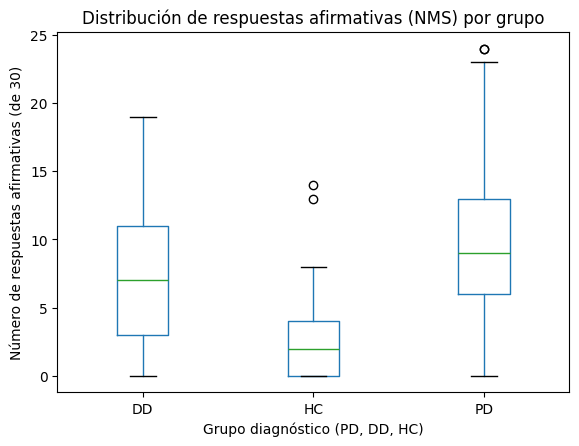


Frecuencia de respuestas 'sí' por síntoma (ordenada por total):
+----+------+------+------+---------+
|    |   PD |   HC |   DD |   Total |
|----+------+------+------+---------|
| 09 | 70.3 | 34.2 | 45.6 |   150.1 |
| 08 | 69.9 | 20.3 | 44.7 |   134.9 |
| 23 | 48.6 | 35.4 | 47.4 |   131.4 |
| 15 | 48.6 | 13.9 | 43   |   105.5 |
| 16 | 36.6 | 12.7 | 37.7 |    87   |
| 12 | 43.1 |  8.9 | 34.2 |    86.2 |
| 20 | 38.4 |  7.6 | 39.5 |    85.5 |
| 05 | 46   |  7.6 | 28.1 |    81.7 |
| 03 | 34.4 |  5.1 | 37.7 |    77.2 |
| 27 | 33.3 | 12.7 | 30.7 |    76.7 |
| 26 | 38   | 10.1 | 28.1 |    76.2 |
| 28 | 33.7 | 16.5 | 22.8 |    73   |
| 02 | 50   |  6.3 | 15.8 |    72.1 |
| 25 | 45.3 |  0   | 24.6 |    69.9 |
| 13 | 30.8 |  2.5 | 34.2 |    67.5 |
| 01 | 39.9 |  2.5 | 19.3 |    61.7 |
| 19 | 31.2 |  7.6 | 21.1 |    59.9 |
| 24 | 32.6 |  5.1 | 21.1 |    58.8 |
| 07 | 33   |  2.5 | 20.2 |    55.7 |
| 18 | 24.6 |  8.9 | 20.2 |    53.7 |
| 21 | 28.3 |  1.3 | 23.7 |    53.3 |
| 22 | 26.1 |  2.5 | 15

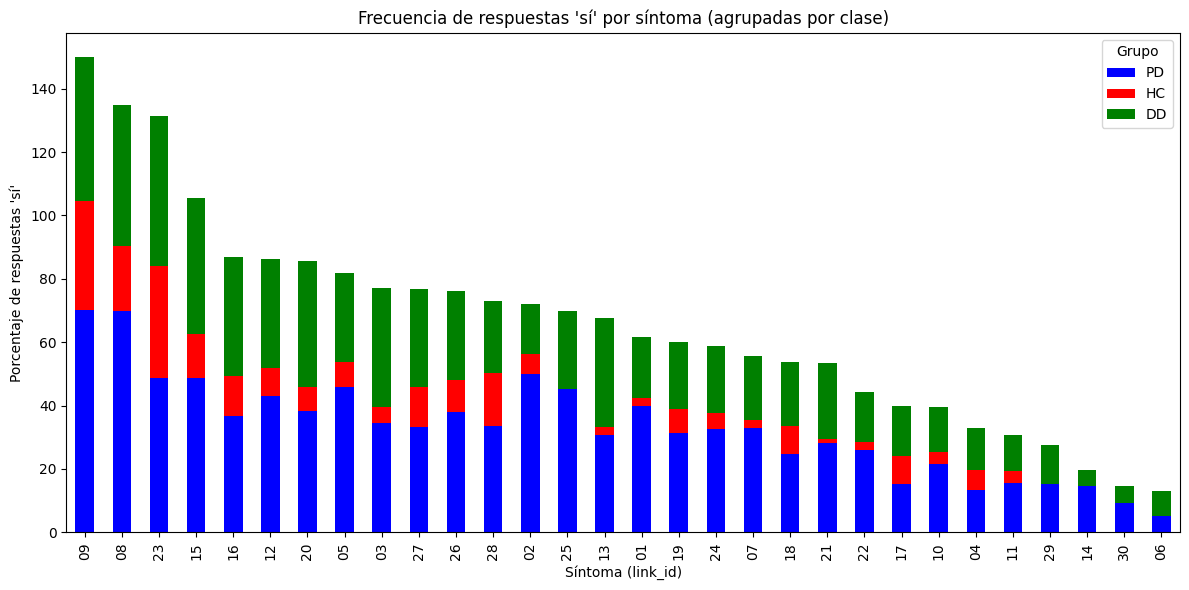

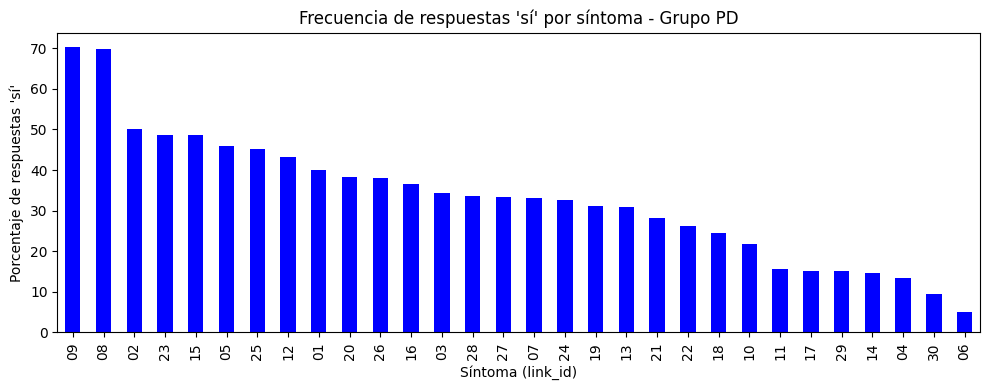

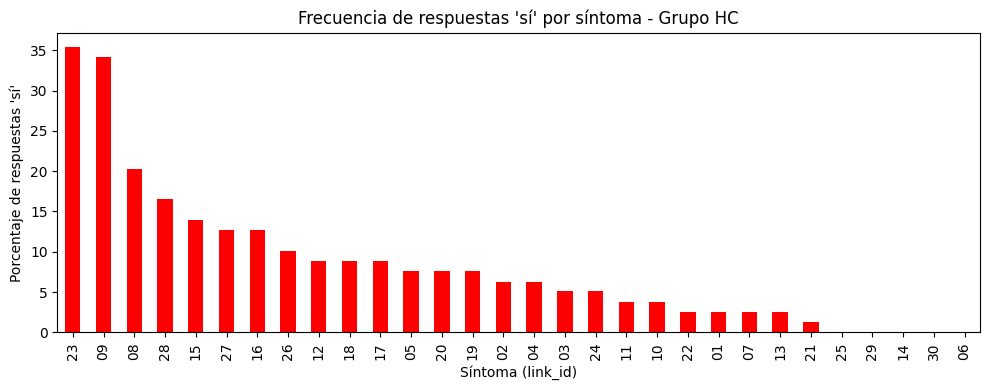

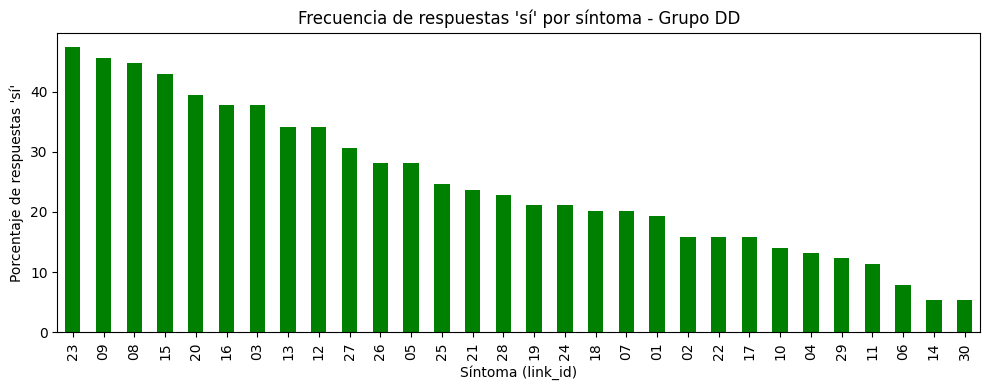

In [3]:
# --------------------------
# 1. Load questionnaire data
# --------------------------
questionnaire_folder = "../../data/questionnaire/"  # Ajusta la ruta si es necesario
questionnaire_files = glob.glob(os.path.join(questionnaire_folder, "questionnaire_response_*.json"))

questionnaire_data = []
for file in questionnaire_files:
    with open(file, 'r') as f:
        questionnaire = json.load(f)
        subject_id = questionnaire['subject_id']
        items = questionnaire['item']
        # Total positive answers (sí) for questionnaire
        yes_count = sum(1 for item in items if item.get('answer') is True)
        # Store answers in a dictionary
        item_answers = {item['link_id']: item.get('answer') for item in items}
        questionnaire_data.append({
            'subject_id': subject_id,
            'quest_yes_count': yes_count,
            **item_answers
        })

df_questionnaire = pd.DataFrame(questionnaire_data)
print("Vista previa del DataFrame de cuestionarios:")
print(tabulate(df_questionnaire.head(), headers="keys", tablefmt="psql"))

# --------------------------
# Merge patient data (PD, DD, HC)
# --------------------------
# Imporatnt: Assume that df_patients exists and contains the 'id' column
df_patients = df_patients.rename(columns={'id': 'subject_id'}) # Rename id to subject_id for merging
df_merged = pd.merge(df_questionnaire, df_patients[['subject_id', 'diagnosis']], on='subject_id', how='inner')
print("\nVista previa del DataFrame combinado (cuestionario + pacientes):")
print(tabulate(df_merged.head(), headers="keys", tablefmt="psql"))

# --------------------------
# Questionnaire summary with diagnosis
# --------------------------
quest_summary = df_merged.groupby('diagnosis').agg(
    Mean=('quest_yes_count', 'mean'),
    Median=('quest_yes_count', 'median'),
    Min=('quest_yes_count', 'min'),
    Max=('quest_yes_count', 'max'),
    Std=('quest_yes_count', 'std'),
    Count=('quest_yes_count', 'count')
).round(1)

print("\nResumen de respuestas afirmativas (NMS) por grupo diagnóstico:")
print(tabulate(quest_summary, headers="keys", tablefmt="psql"))
# Expectations:
#   PD: mean 9-10 yes answers
#   DD: mean 6-7 yes answers
#   HC: mean 4-5 yes answers

# --------------------------
# Boxplot for distribution of yes answers
# --------------------------
plt.figure(figsize=(8, 6))
df_merged.boxplot(column='quest_yes_count', by='diagnosis', grid=False)
plt.title("Distribución de respuestas afirmativas (NMS) por grupo")
plt.suptitle("")  # Remover título automático
plt.xlabel("Grupo diagnóstico (PD, DD, HC)")
plt.ylabel("Número de respuestas afirmativas (de 30)")
plt.show()

# --------------------------
# Frequency analysis by symptom
# --------------------------

question_columns = [col for col in df_merged.columns if col not in ['subject_id', 'quest_yes_count', 'diagnosis']]

# Get "yes" frequency for each symptom (column) by group
freq_by_symptom = {}
for group in df_merged['diagnosis'].unique():
    group_data = df_merged[df_merged['diagnosis'] == group]
    freq = {}
    for col in question_columns:
        # La media de un valor booleano equivale a la proporción de "True"
        freq[col] = round(group_data[col].mean() * 100, 1)
    freq_by_symptom[group] = pd.DataFrame.from_dict(freq, orient='index', columns=['% Sí'])
    
# Combine frequencies into a single DataFrame
df_freq = pd.concat([
    freq_by_symptom['PD'].rename(columns={'% Sí': 'PD'}),
    freq_by_symptom['HC'].rename(columns={'% Sí': 'HC'}),
    freq_by_symptom['DD'].rename(columns={'% Sí': 'DD'})
], axis=1)

# Get total sum and order by total
df_freq['Total'] = df_freq.sum(axis=1)
df_freq_sorted = df_freq.sort_values('Total', ascending=False)
print("\nFrecuencia de respuestas 'sí' por síntoma (ordenada por total):")
print(tabulate(df_freq_sorted, headers="keys", tablefmt="psql"))

# --------------------------
# 1. Combined graph: Stacked bar chart
# --------------------------
# Divide each bar in 3 parts (PD, HC, DD)
ax = df_freq_sorted[['PD', 'HC', 'DD']].plot(kind='bar', stacked=True, color=['blue', 'red', 'green'], figsize=(12, 6))
plt.title("Frecuencia de respuestas 'sí' por síntoma (agrupadas por clase)")
plt.xlabel("Síntoma (link_id)")
plt.ylabel("Porcentaje de respuestas 'sí'")
plt.legend(title="Grupo")
plt.tight_layout()
plt.show()

# --------------------------
# 2. Separate graphs for each group
# --------------------------
for group, color in zip(['PD', 'HC', 'DD'], ['blue', 'red', 'green']):
    plt.figure(figsize=(10, 4))
    # Re-ordenar los sintomas para cada grupo por separado
    df_freq_sorted_group = df_freq_sorted[group].sort_values(ascending=False)
    df_freq_sorted_group.plot(kind='bar', color=color)
    plt.title(f"Frecuencia de respuestas 'sí' por síntoma - Grupo {group}")
    plt.xlabel("Síntoma (link_id)")
    plt.ylabel("Porcentaje de respuestas 'sí'")
    plt.tight_layout()
    plt.show()

# Analisis Exploratorio de Datos - Datos de sensores

En el caso de los datos de sensores, los pacientes llevaeron a cabo tareas motrices usando dos *smartwatches*, uno en cada muñeca. Cada tarea es un movimiento o postura bien definido que fue diseñado por neurologos para provocar un fenomeno motor specifico. Estas tareas incuyen:

1. Reposo - Sentarse en reposo con brazos en reposo

2. Estirar brazo - Mantener brazos estirados

3. Soportar peso - Soportar un peso ligero en las manos

4. Tomar de un vaso

5. Cruzarse de brazos

6. Dedo a la nariz - Repetidamente tocarse la nariz con el dedo

7. Entretenimiento - Movimientos repetidos para probar como interfieren los dos brazos 

Cada tarea tiene una duracion de aproximadamente 10 segundos, a excepcion de tres tareas que tienen una duracion de 20 segundos. (Dos de reposo y la de entretenimiento).
Cada *smartwatch* contiene un registro a 100Hz en 6 canales (3 ejes para acelerometro y 3 ejes para el giroscopio) para cada muñeca. Con lo que para cada canal, se tienen por lo menos 1000 registros (pues se tienen 10 segundos a 100Hz).

Se define un dato importante junto con el set de datos, que es que el *smartwatch* contiene una vibracion y por lo tanto se recomienda no utilizar los primeros 0.5 segundos para cada registro.

Para comenzar a comprender estos datos de series temporales, se verifica la diferencia entre los datos del acelerometro de un paciente en PD y uno en HC. Aqui se puede observar claramente como el paciente con PD tiene una oscilacion clara de al rededor de 4Hz (en una tarea de reposo), mientras que el paciente en HC se mantiene en 0 (con un leve ruido de fondo).

448    PD
Name: diagnosis, dtype: object
82    HC
Name: diagnosis, dtype: object


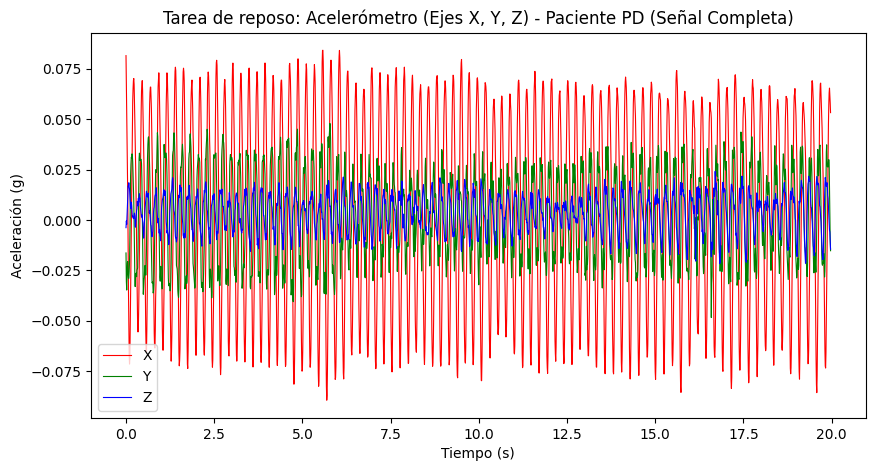

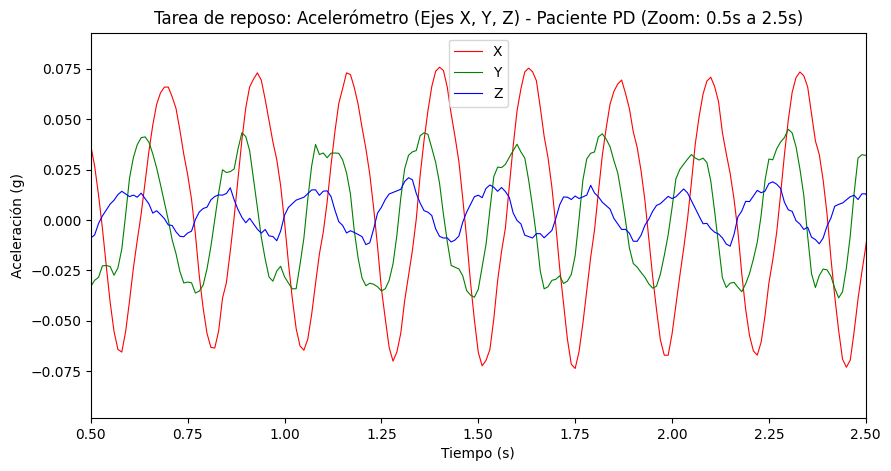

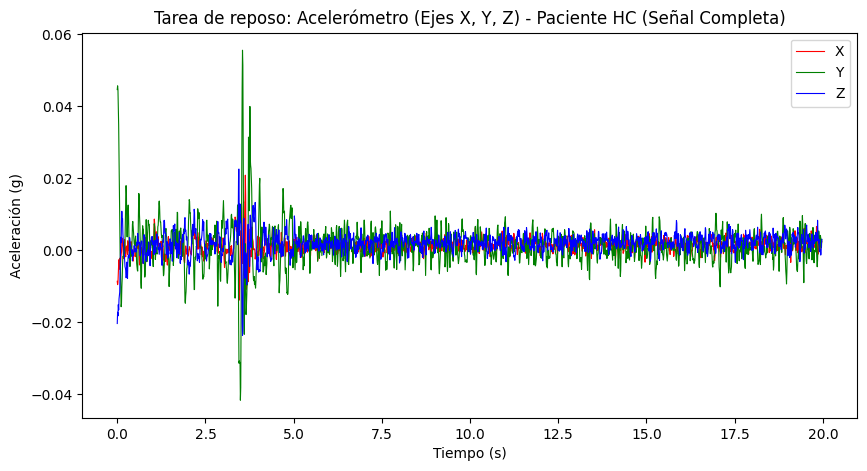

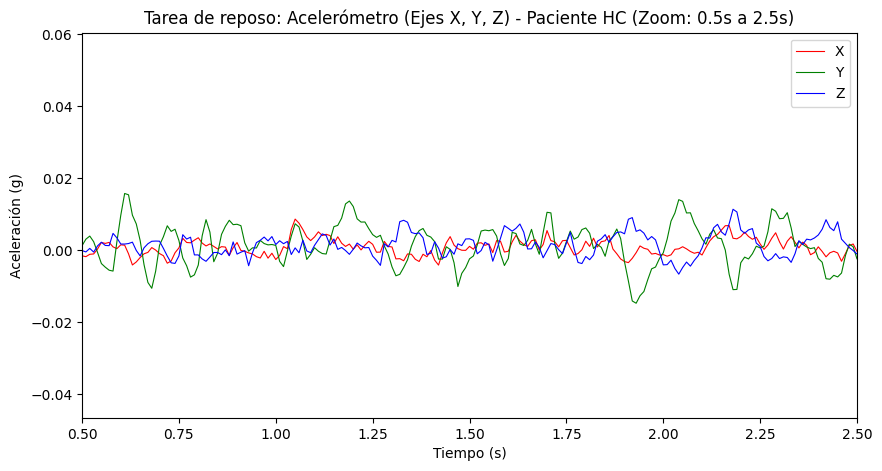

In [4]:
# Load sensor data and remove first 0.5 seconds
def load_sensor_data(filepath, fs=100, skip_seconds=0.5):
    """
    Carga un archivo de datos de sensor (formato CSV sin header) y omite los primeros 'skip_seconds'.
    """
    data = pd.read_csv(filepath, header=None)
    skip_samples = int(fs * skip_seconds)
    data = data.iloc[skip_samples:, :]
    return data

fs = 100  # Frecuencia de muestreo en Hz

print(df_patients[df_patients['subject_id'] == '060']['diagnosis'])
if not df_patients[df_patients['subject_id'] == '060']['diagnosis'].values[0] == 'PD':
    print("Patient 060 is not PD")

print(df_patients[df_patients['subject_id'] == '078']['diagnosis'])
if not df_patients[df_patients['subject_id'] == '078']['diagnosis'].values[0] == 'HC':
    print("Patient 078 is not HC")

# --------------------------
# Plot 1: Realxed Task - Accelerometer comparison
# --------------------------
# Select two random patients (PD and HC) for comparison
pd_rest_file = "../../data/movement/timeseries/060_Relaxed_LeftWrist.txt"   # Paciente PD
hc_rest_file = "../../data/movement/timeseries/078_Relaxed_LeftWrist.txt"   # Paciente HC

# Load sensor data (skip first 0.5 seconds)
pd_rest_data = load_sensor_data(pd_rest_file, fs=fs, skip_seconds=0.5)
hc_rest_data = load_sensor_data(hc_rest_file, fs=fs, skip_seconds=0.5)

# Extract accelerometer data
# 0: Time, 1: Accelerometer_X, 2: Accelerometer_Y, 3: Accelerometer_Z
# --- Para paciente PD ---
pd_acc_x = pd_rest_data.iloc[:, 1].values
pd_acc_y = pd_rest_data.iloc[:, 2].values
pd_acc_z = pd_rest_data.iloc[:, 3].values
t_pd = np.arange(len(pd_acc_x)) / fs

# --- Para paciente HC ---
hc_acc_x = hc_rest_data.iloc[:, 1].values
hc_acc_y = hc_rest_data.iloc[:, 2].values
hc_acc_z = hc_rest_data.iloc[:, 3].values
t_hc = np.arange(len(hc_acc_x)) / fs

# Plot for patient PD (Rest) - Full signal
plt.figure(figsize=(10, 5))
plt.plot(t_pd, pd_acc_x, label="X", color="red", linewidth=0.8)
plt.plot(t_pd, pd_acc_y, label="Y", color="green", linewidth=0.8)
plt.plot(t_pd, pd_acc_z, label="Z", color="blue", linewidth=0.8)
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración (g)")
plt.title("Tarea de reposo: Acelerómetro (Ejes X, Y, Z) - Paciente PD (Señal Completa)")
plt.legend()
plt.show()

# Plot for patient PD (Rest) - Zoom window (0.5s to 2.5s)
plt.figure(figsize=(10, 5))
plt.plot(t_pd, pd_acc_x, label="X", color="red", linewidth=0.8)
plt.plot(t_pd, pd_acc_y, label="Y", color="green", linewidth=0.8)
plt.plot(t_pd, pd_acc_z, label="Z", color="blue", linewidth=0.8)
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración (g)")
plt.title("Tarea de reposo: Acelerómetro (Ejes X, Y, Z) - Paciente PD (Zoom: 0.5s a 2.5s)")
plt.xlim(0.5, 2.5)
plt.legend()
plt.show()

# Plot for patient HC (Rest) - Full signal
plt.figure(figsize=(10, 5))
plt.plot(t_hc, hc_acc_x, label="X", color="red", linewidth=0.8)
plt.plot(t_hc, hc_acc_y, label="Y", color="green", linewidth=0.8)
plt.plot(t_hc, hc_acc_z, label="Z", color="blue", linewidth=0.8)
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración (g)")
plt.title("Tarea de reposo: Acelerómetro (Ejes X, Y, Z) - Paciente HC (Señal Completa)")
plt.legend()
plt.show()

# Plot for patient HC (Rest) - Zoom window (0.5s to 2.5s)
plt.figure(figsize=(10, 5))
plt.plot(t_hc, hc_acc_x, label="X", color="red", linewidth=0.8)
plt.plot(t_hc, hc_acc_y, label="Y", color="green", linewidth=0.8)
plt.plot(t_hc, hc_acc_z, label="Z", color="blue", linewidth=0.8)
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración (g)")
plt.title("Tarea de reposo: Acelerómetro (Ejes X, Y, Z) - Paciente HC (Zoom: 0.5s a 2.5s)")
plt.xlim(0.5, 2.5)
plt.legend()
plt.show()

# Analisis Exploratorio de Datos - Analisis detallado de sensores

Aunque en el analisis observamos un caso puntual en donde podemos detectar claramente (sin necesidad de metodos cuantitativos) que existe una clara oscilacion en un paciente de Parkinson y no existe una similar en un paciente saludable, nos interesa saber si esto sucede en general para todos los pacientes, o hemos escogido un caso particular.

Por lo tanto, se realiza un analisis mas integral en donde se toman todas las tareas y se evaluan integralmente todos los pacientes. Para poder determinar si existe una oscilacion en los sensores, lo que indica un movimiento tenue pero repetido, se relaiza una Fast Fourier Transform (FFT), que nos permite llevar los datos al dominio de frecuencia y realizar un PSD (Power Spectrum Density) donde podemos observar como son las frecuencias de nuestros datos.

Para ello hacemos dos casos, los acelerometros para cada eje y los giroscopios para cada eje, a los fines de intentar encontrar claras demostraciones de movimientos repetitivos que indican temblores.
En particular, en varias de las tareas es dificil encontrar una clara falta de correlacion en la distribucion de frecuencias, pero en otras es particularmente notable. Es muy visible en los casos de relajacion en donde existe un claro movimiento oscilante para los pacientes con PD, e incluso no existe una correlacion tan importante con los pacientes en DD. Con respecto a HC la diferencia es notable. 

TODO: Agregar algo mas si es necesario

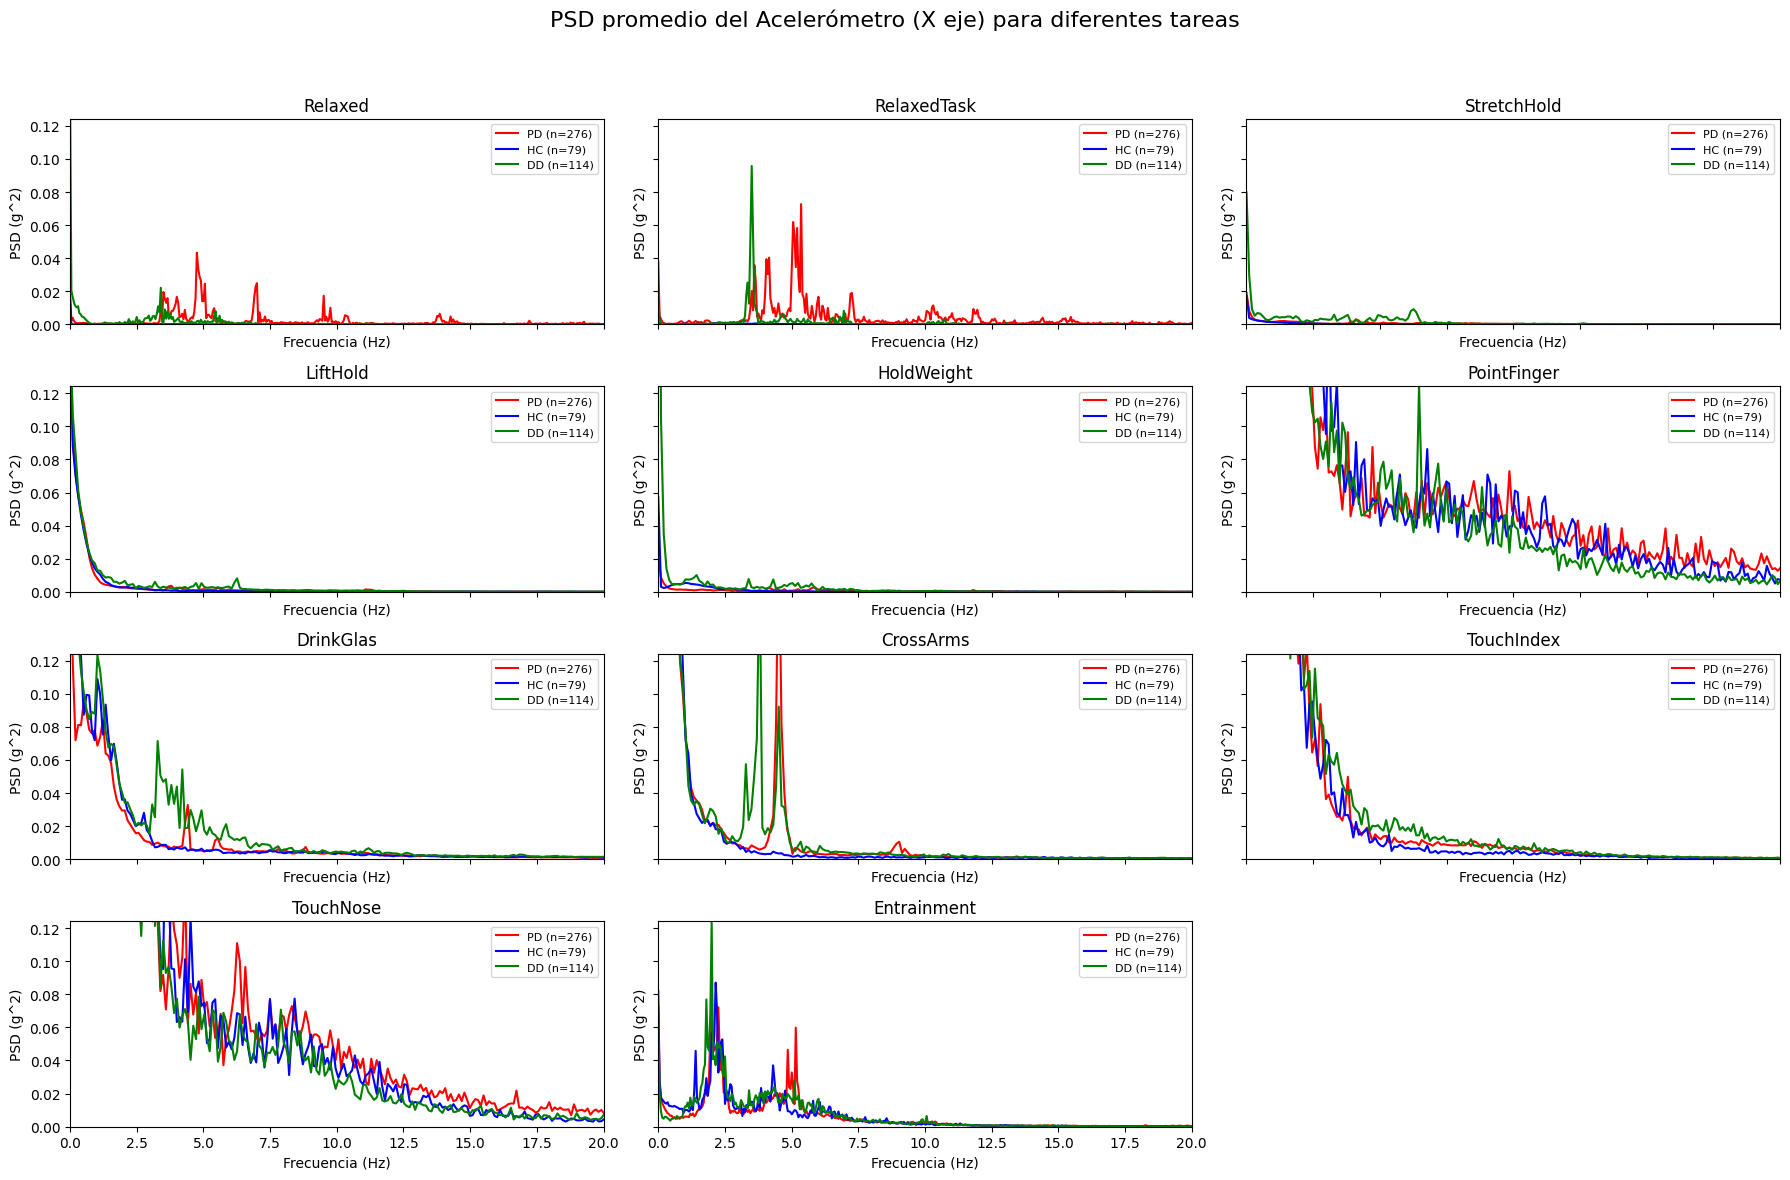

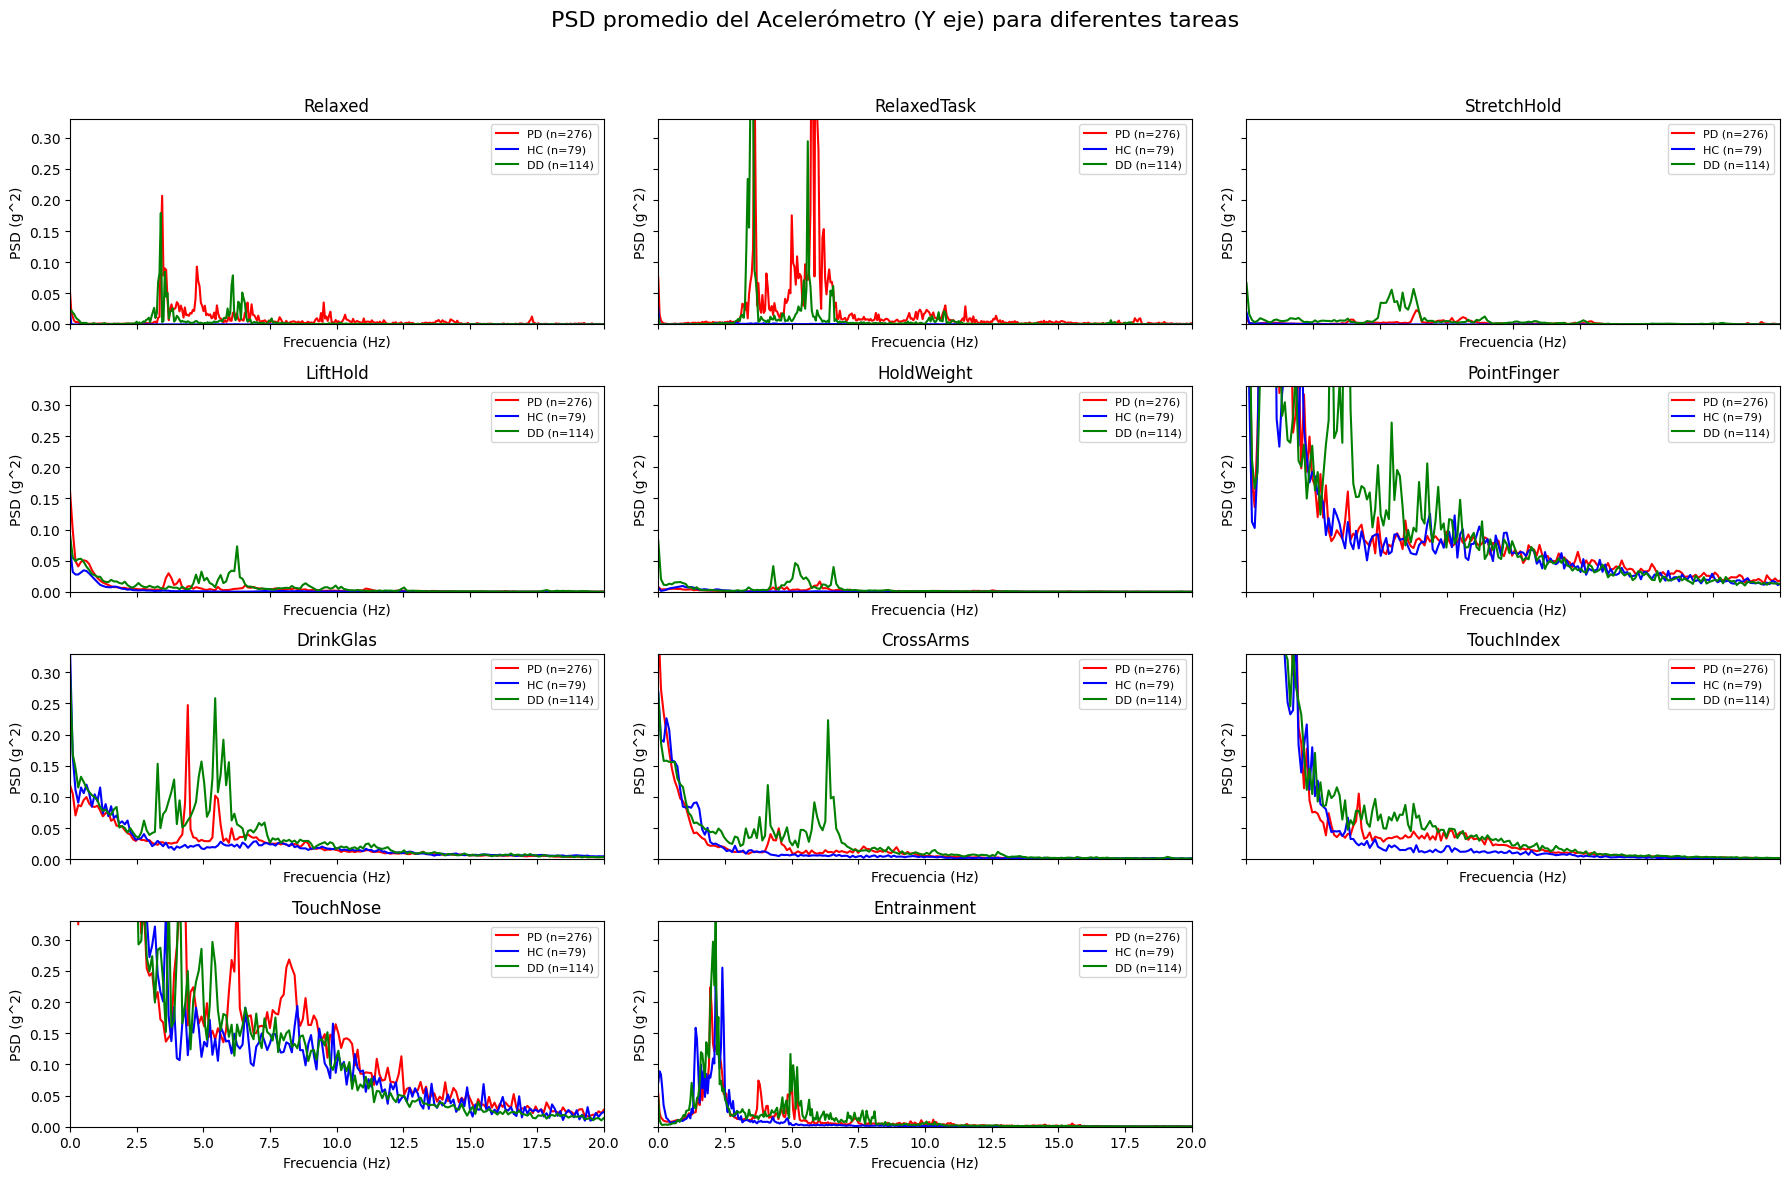

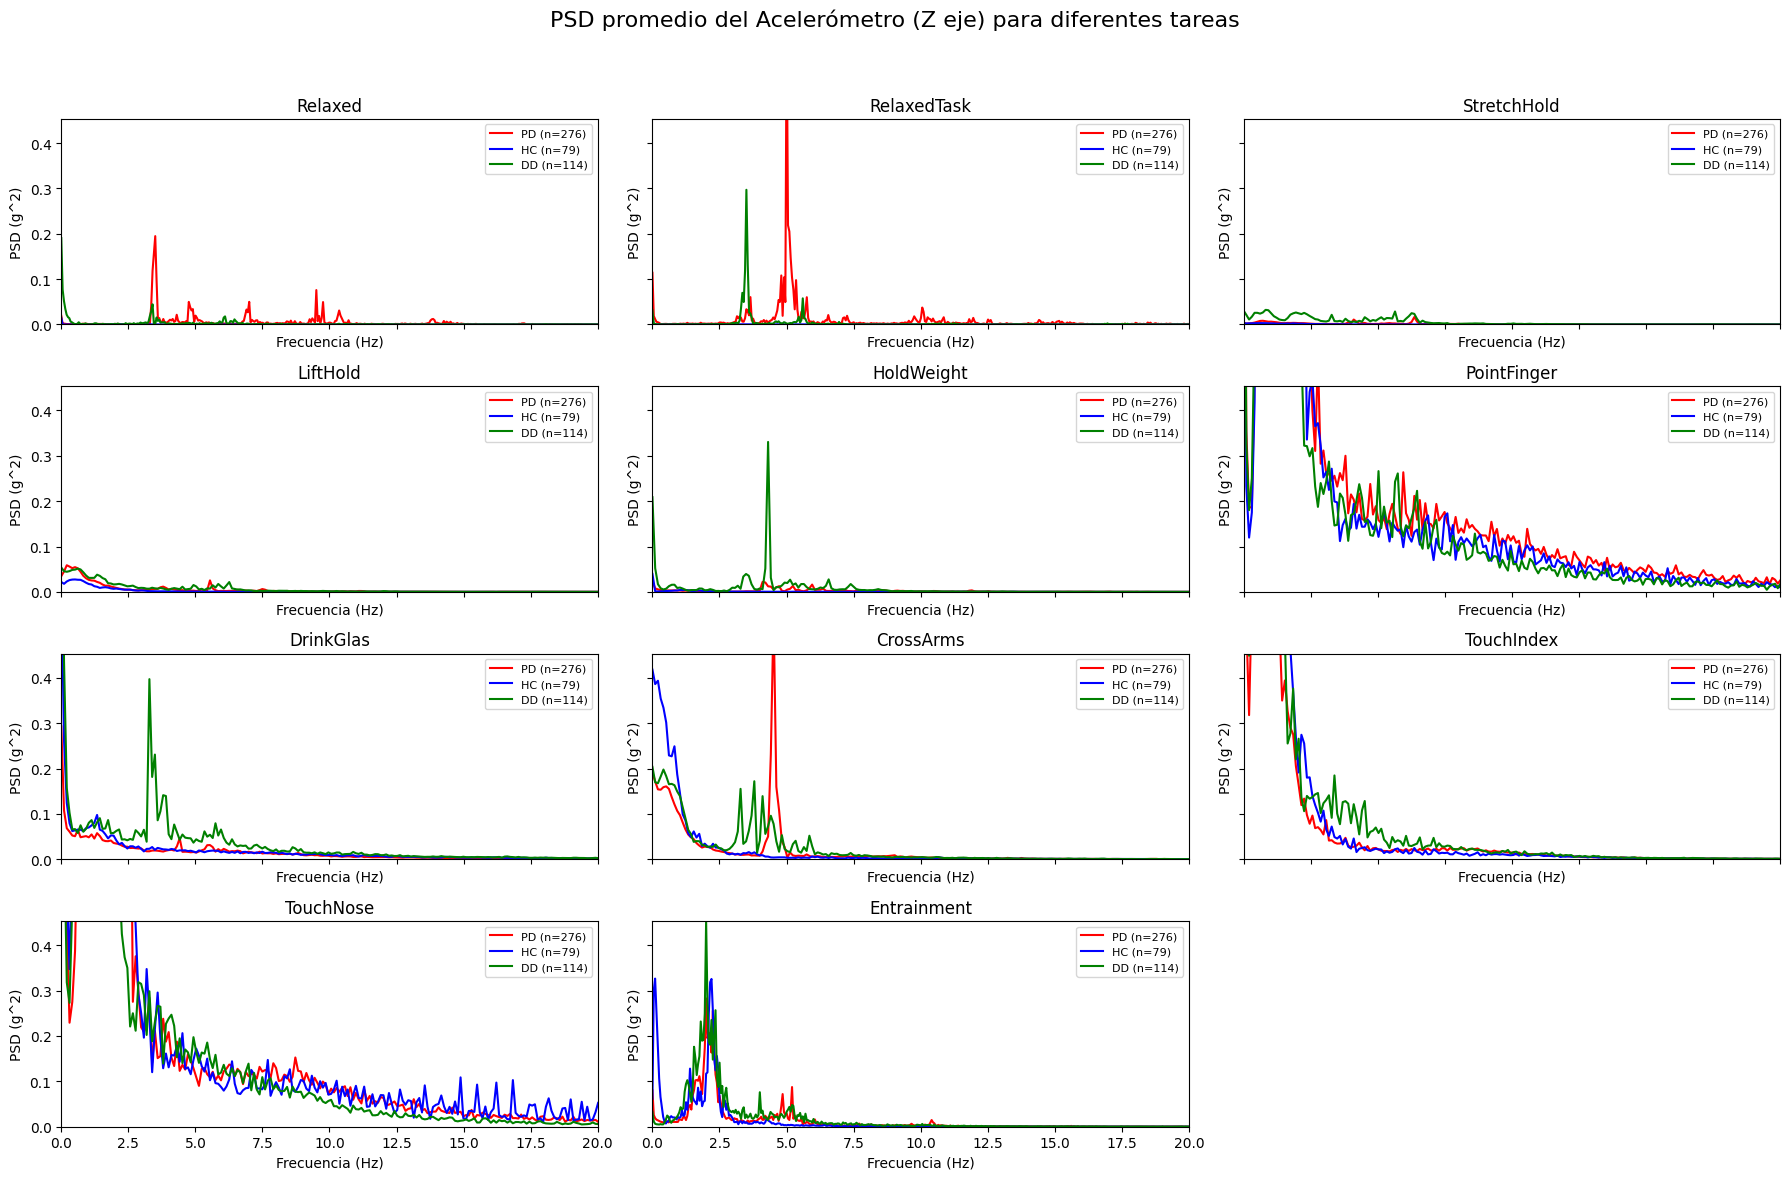

In [5]:
fs = 100  # Sampling frequency in Hz
colors = {"PD": "red", "HC": "blue", "DD": "green"}

# Load time series data for a given subject and task
def load_time_series(subject_id, task="Relaxed", wrist="LeftWrist", data_dir="../../data/movement/timeseries/"):
    # Asume que los archivos se nombran como: {subject_id}_{task}_{wrist}.txt
    filename = os.path.join(data_dir, f"{subject_id}_{task}_{wrist}.txt")
    if os.path.exists(filename):
        return load_sensor_data(filename, fs=fs, skip_seconds=0.5)
    else:
        return None

# Compute FFT and Power Spectral Density (PSD)
def compute_fft(signal, fs=100):
    """
    Computa el FFT de una señal y retorna los frecuencias y la densidad de potencia.
    """
    n = len(signal)
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(n, d=1/fs)
    psd = (np.abs(fft_vals) ** 2) / n
    return freqs, psd

# -------------------------------------------------------------------
# Define tasks to use
tasks = ["Relaxed", "RelaxedTask", "StretchHold", "LiftHold", "HoldWeight", 
         "PointFinger", "DrinkGlas", "CrossArms", "TouchIndex", "TouchNose", "Entrainment"]

# Define column mapping for each axis
acc_axes = {"X": 1, "Y": 2, "Z": 3}

# Create a figure per axis
for axis in ["X", "Y", "Z"]:
    # Initialize results dictionary to store PSD for each task and group
    results = {task: {"PD": [], "HC": [], "DD": []} for task in tasks}
    group_counts = {task: {"PD": 0, "HC": 0, "DD": 0} for task in tasks}
    freqs_dict = {}  # Almacenará el vector de frecuencias para cada task

    # Iterate over patients
    for idx, row in df_patients.iterrows():
        subject_id = row["subject_id"]
        diagnosis = row["diagnosis"]
        for task in tasks:
            ts_data = load_time_series(subject_id, task=task, wrist="LeftWrist")
            if ts_data is not None:
                # Extract the accelerometer data for the specified axis
                signal = ts_data.iloc[:, acc_axes[axis]].values  
                freqs, psd = compute_fft(signal, fs=fs)
                results[task][diagnosis].append(psd)
                group_counts[task][diagnosis] += 1
                # Store the frequencies for the first occurrence of each task
                if task not in freqs_dict:
                    freqs_dict[task] = freqs

    # For each task, compute the average PSD across all patients
    avg_psd = {} 
    freqs_trimmed = {}
    for task in tasks:
        all_psd = []
        for group in ["PD", "HC", "DD"]:
            all_psd.extend(results[task][group])
        if all_psd:
            global_min_len = min([len(x) for x in all_psd])
            freqs_trimmed[task] = freqs_dict[task][:global_min_len]
            avg_psd[task] = {}
            for group in ["PD", "HC", "DD"]:
                if results[task][group]:
                    # Average the PSD for each group, trimming to the minimum length
                    avg_psd[task][group] = np.mean([x[:global_min_len] for x in results[task][group]], axis=0)
                else:
                    avg_psd[task][group] = None
        else:
            freqs_trimmed[task] = None
            avg_psd[task] = {group: None for group in ["PD", "HC", "DD"]}

    # Plot: Create 1 figure with subplots for each task
    n_tasks = len(tasks)
    ncols = 3
    nrows = int(np.ceil(n_tasks / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(18, 12), sharex=True, sharey=True)
    axs = axs.flatten()

    for i, task in enumerate(tasks):
        ax = axs[i]
        for group in ["PD", "HC", "DD"]:
            if avg_psd[task][group] is not None:
                ax.plot(freqs_trimmed[task], avg_psd[task][group],
                        label=f"{group} (n={group_counts[task][group]})", color=colors[group])
        ax.set_title(task)
        ax.set_xlim(0, 20)
        # Set ylim based on maximum value across groups for this task
        valid_vals = [np.max(avg_psd[task][g]) for g in ["PD", "HC", "DD"] if avg_psd[task][g] is not None]
        if valid_vals:
            ax.set_ylim(0, max(valid_vals))
        ax.set_xlabel("Frecuencia (Hz)")
        ax.set_ylabel("PSD (g^2)")
        ax.legend(fontsize=8)

    # Drop empty subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle(f"PSD promedio del Acelerómetro ({axis} eje) para diferentes tareas", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


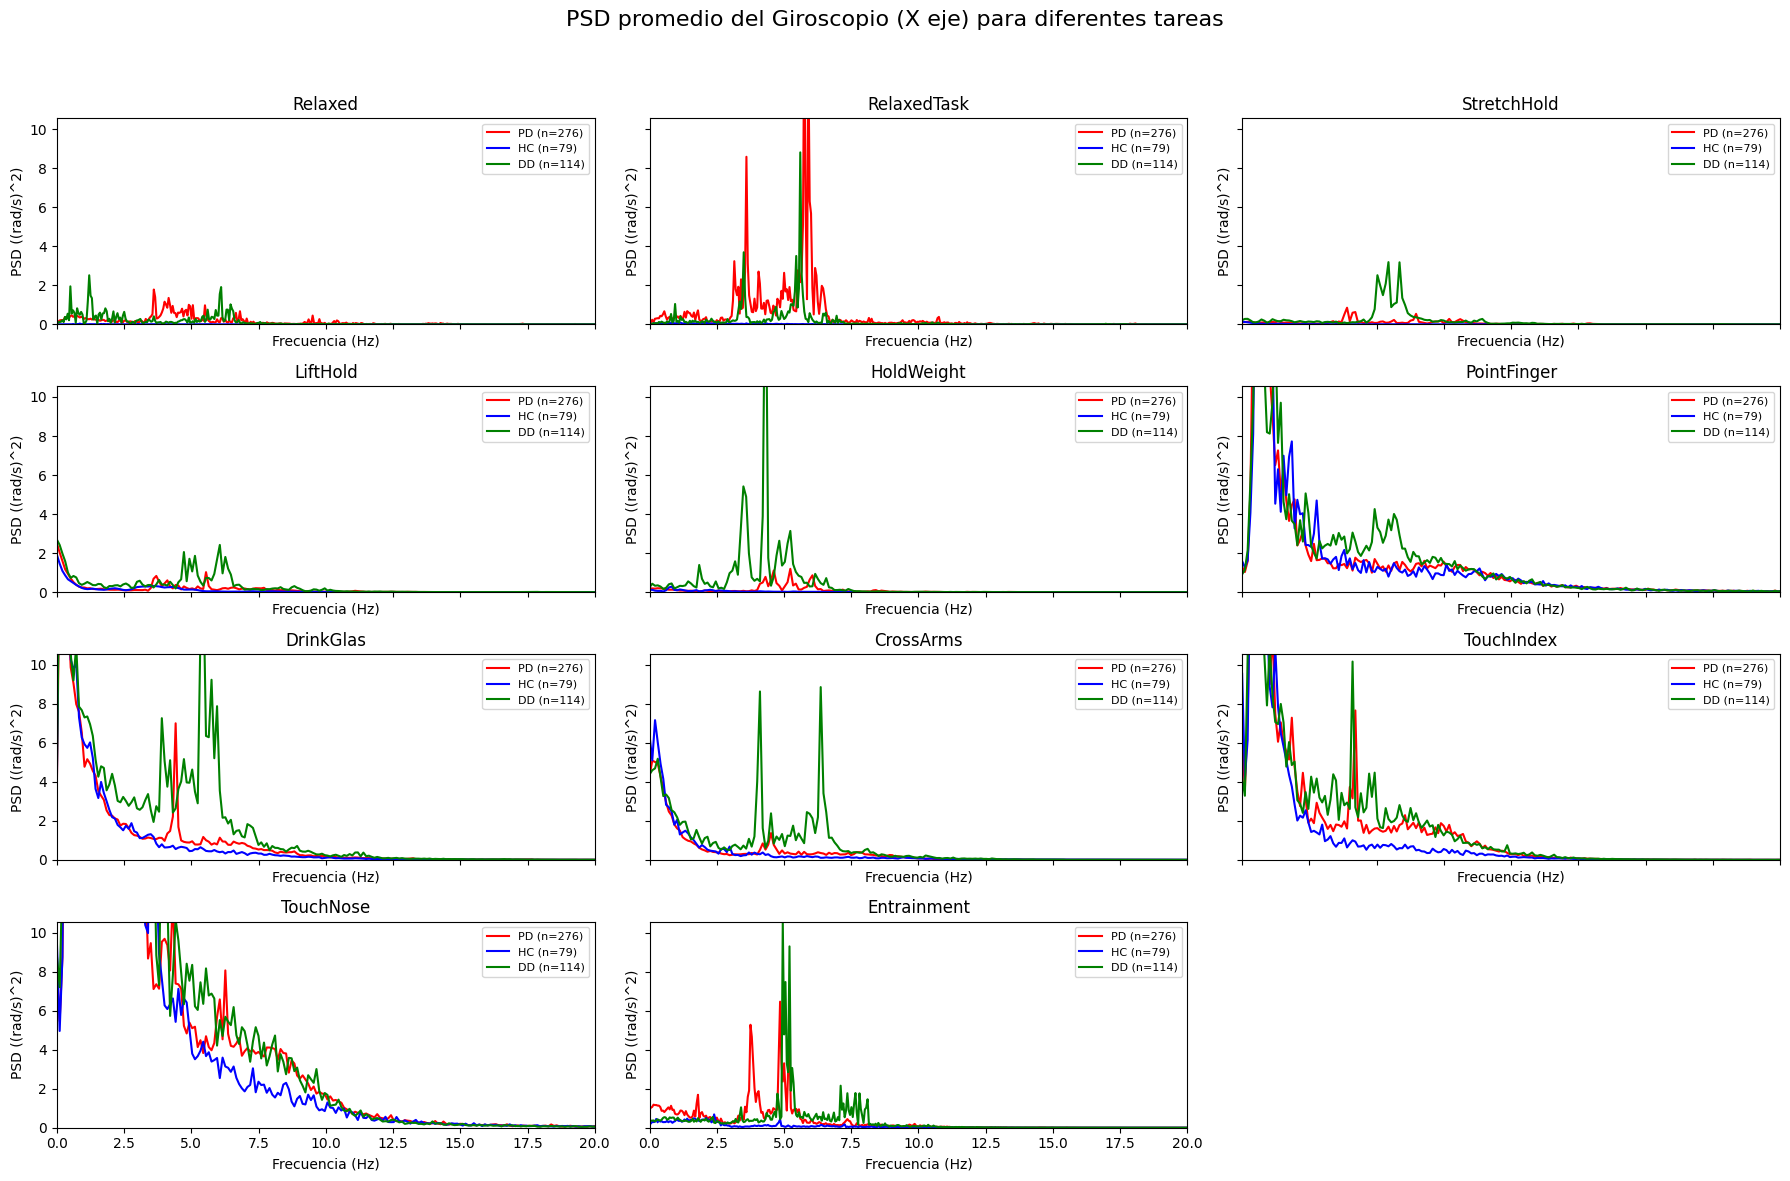

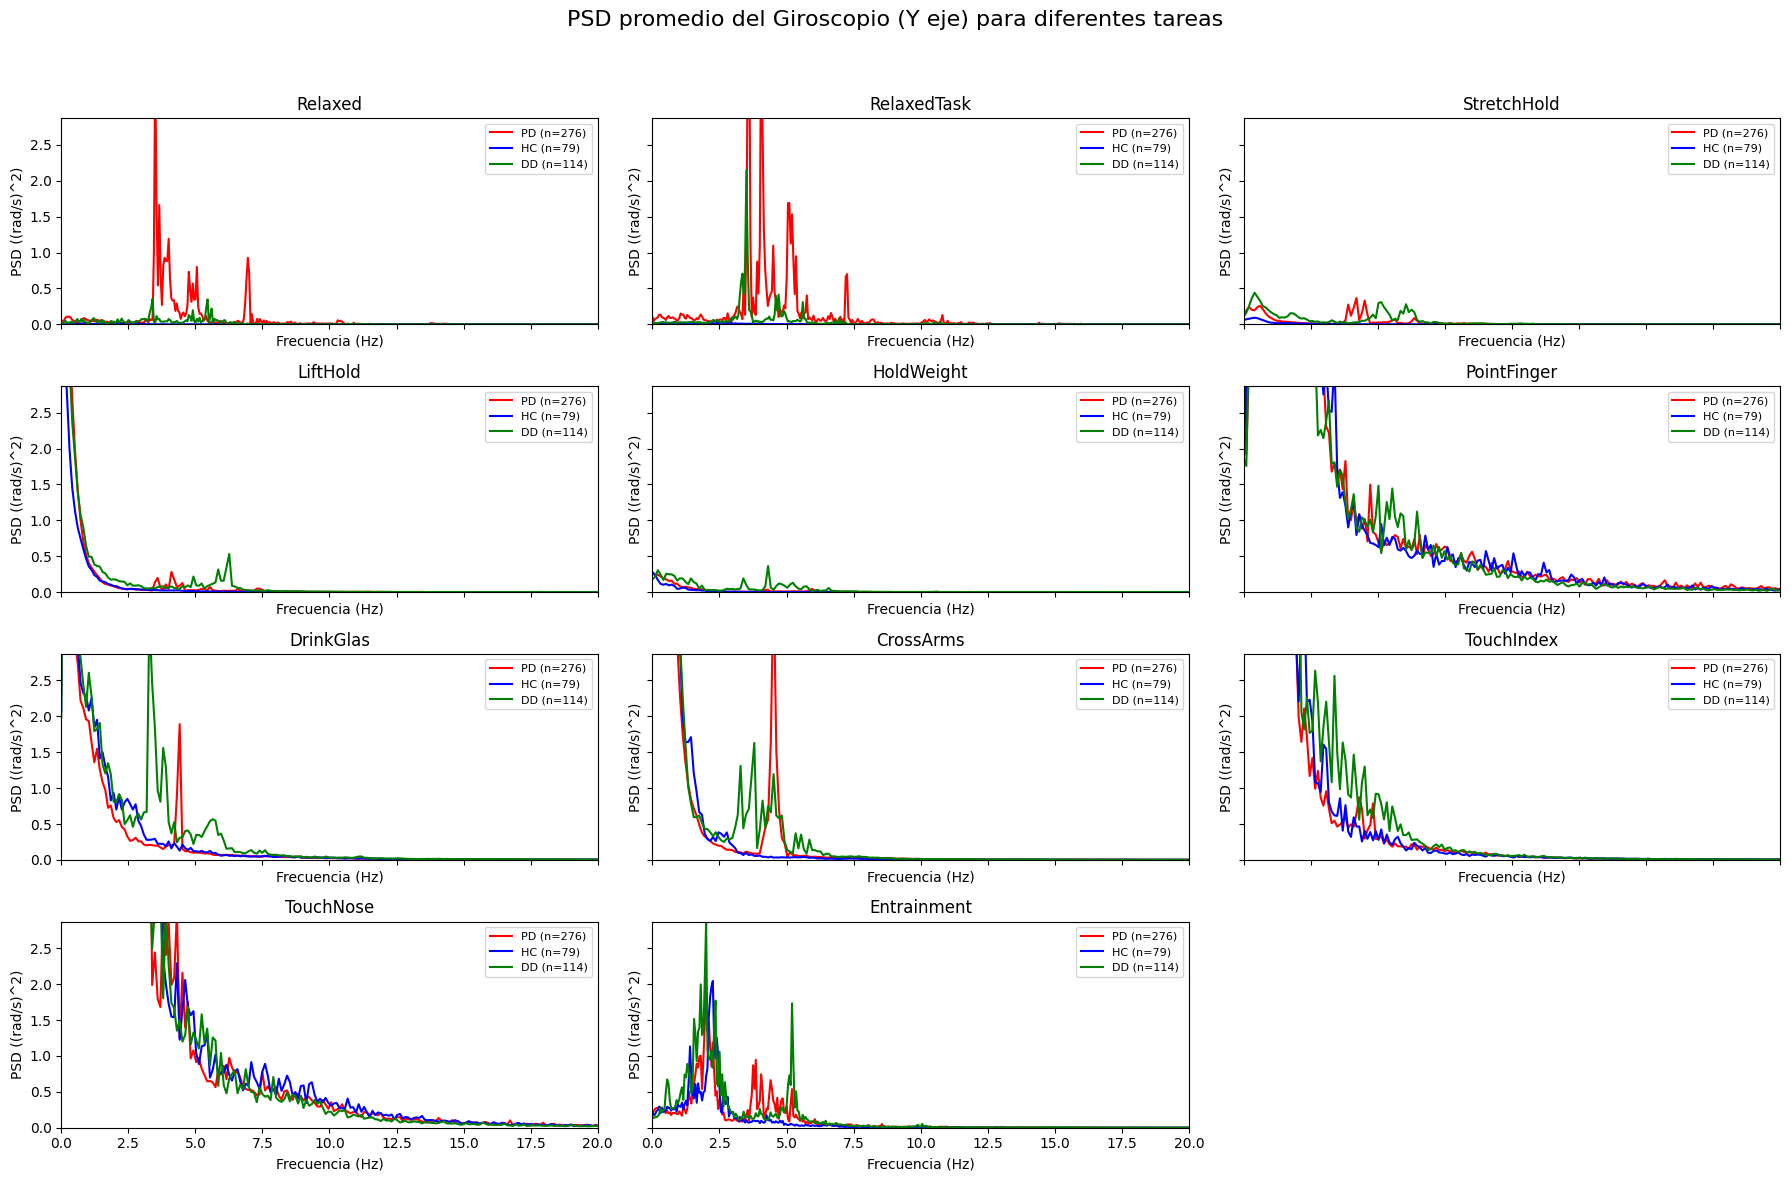

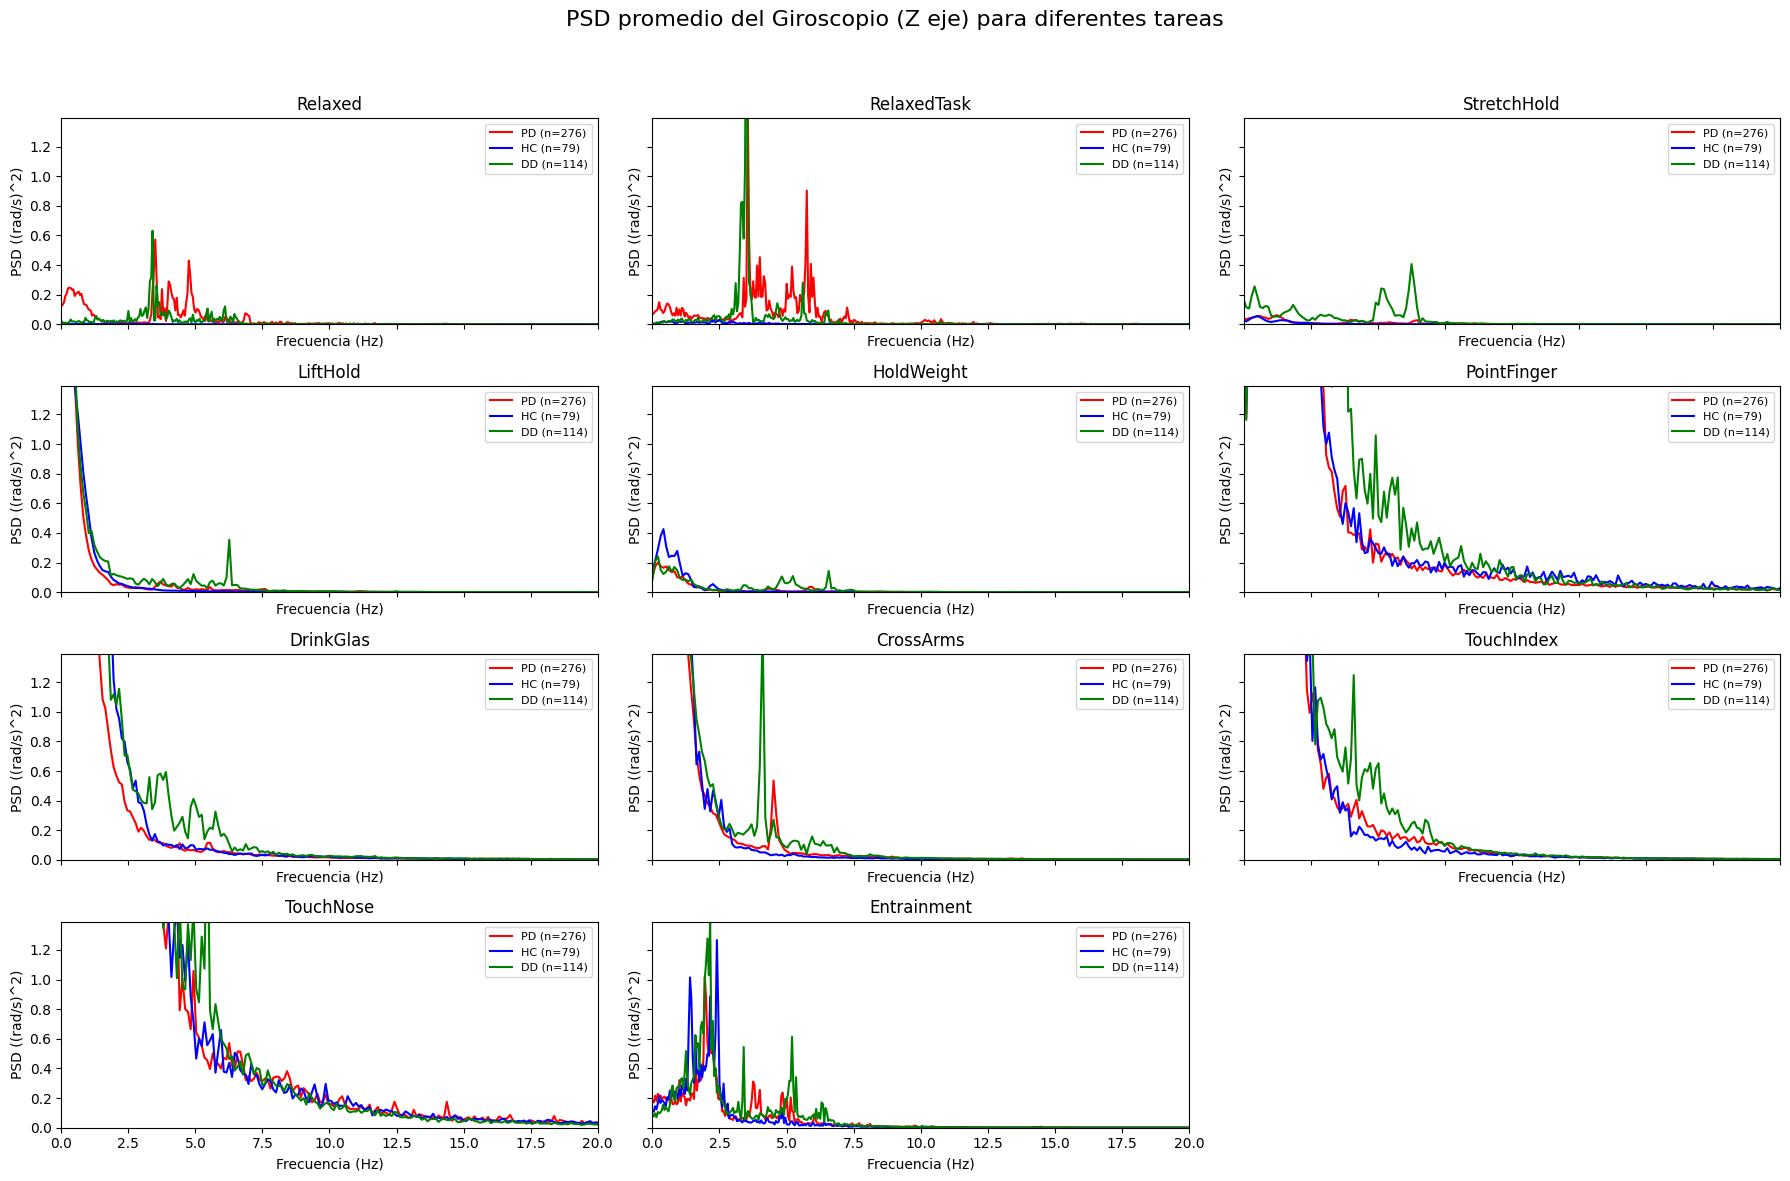

In [6]:
# Define mapping for gyroscope axes
gyro_axes = {"X": 4, "Y": 5, "Z": 6}

# Create a figure per axis
for axis in ["X", "Y", "Z"]:
    # Initialize results dictionary to store PSD for each task and group
    results = {task: {"PD": [], "HC": [], "DD": []} for task in tasks}
    group_counts = {task: {"PD": 0, "HC": 0, "DD": 0} for task in tasks}
    freqs_dict = {}  # Se guardará el vector de frecuencias para cada task
    
    # Iterate over patients
    for idx, row in df_patients.iterrows():
        subject_id = row["subject_id"]
        diagnosis = row["diagnosis"]
        for task in tasks:
            ts_data = load_time_series(subject_id, task=task, wrist="LeftWrist")
            if ts_data is not None:
                # Extract the gyroscope data for the specified axis
                signal = ts_data.iloc[:, gyro_axes[axis]].values  
                freqs, psd = compute_fft(signal, fs=fs)
                results[task][diagnosis].append(psd)
                group_counts[task][diagnosis] += 1
                if task not in freqs_dict:
                    freqs_dict[task] = freqs

    # Para cada task, recortar todas las PSD a una longitud común y calcular el promedio.
    avg_psd = {}      # Promedio de PSD por tarea y grupo.
    freqs_trimmed = {}  # Vector de frecuencia recortado para cada task.
    for task in tasks:
        all_psd = []
        for group in ["PD", "HC", "DD"]:
            all_psd.extend(results[task][group])
        if all_psd:
            global_min_len = min([len(x) for x in all_psd])
            freqs_trimmed[task] = freqs_dict[task][:global_min_len]
            avg_psd[task] = {}
            for group in ["PD", "HC", "DD"]:
                if results[task][group]:
                    avg_psd[task][group] = np.mean([x[:global_min_len] for x in results[task][group]], axis=0)
                else:
                    avg_psd[task][group] = None
        else:
            freqs_trimmed[task] = None
            avg_psd[task] = {group: None for group in ["PD", "HC", "DD"]}
    
    # Plot: Create 1 figure with subplots for each task
    n_tasks = len(tasks)
    ncols = 3
    nrows = int(np.ceil(n_tasks / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(18, 12), sharex=True, sharey=True)
    axs = axs.flatten()
    
    for i, task in enumerate(tasks):
        ax = axs[i]
        for group in ["PD", "HC", "DD"]:
            if avg_psd[task][group] is not None:
                ax.plot(freqs_trimmed[task], avg_psd[task][group],
                        label=f"{group} (n={group_counts[task][group]})", color=colors[group])
        ax.set_title(task)
        ax.set_xlim(0, 20)
        valid_vals = [np.max(avg_psd[task][g]) for g in ["PD", "HC", "DD"] if avg_psd[task][g] is not None]
        if valid_vals:
            ax.set_ylim(0, max(valid_vals))
        ax.set_xlabel("Frecuencia (Hz)")
        ax.set_ylabel("PSD ((rad/s)^2)")
        ax.legend(fontsize=8)
    
    # Eliminar subplots no utilizados, si existen.
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])
    
    fig.suptitle(f"PSD promedio del Giroscopio ({axis} eje) para diferentes tareas", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



Task: Relaxed, Axis: X
Group      Count  Peak Freq (Hz)    Band Power (4-6 Hz)
-------  -------  ----------------  ---------------------
PD           276  1.85 ± 2.87       3.47e-01 ± 2.93e+00
HC            79  0.48 ± 1.28       3.90e-03 ± 8.05e-03
DD           114  1.79 ± 2.61       7.72e-02 ± 3.40e-01

Task: Relaxed, Axis: Y
Group      Count  Peak Freq (Hz)    Band Power (4-6 Hz)
-------  -------  ----------------  ---------------------
PD           276  1.65 ± 2.85       9.12e-01 ± 5.11e+00
HC            79  1.02 ± 2.42       8.67e-03 ± 3.01e-02
DD           114  2.02 ± 2.91       2.22e-01 ± 8.05e-01

Task: Relaxed, Axis: Z
Group      Count  Peak Freq (Hz)    Band Power (4-6 Hz)
-------  -------  ----------------  ---------------------
PD           276  1.16 ± 2.60       3.80e-01 ± 3.36e+00
HC            79  0.61 ± 1.99       2.29e-03 ± 8.71e-03
DD           114  1.54 ± 2.60       9.06e-02 ± 3.86e-01

Task: RelaxedTask, Axis: X
Group      Count  Peak Freq (Hz)    Band Power (4-6 Hz

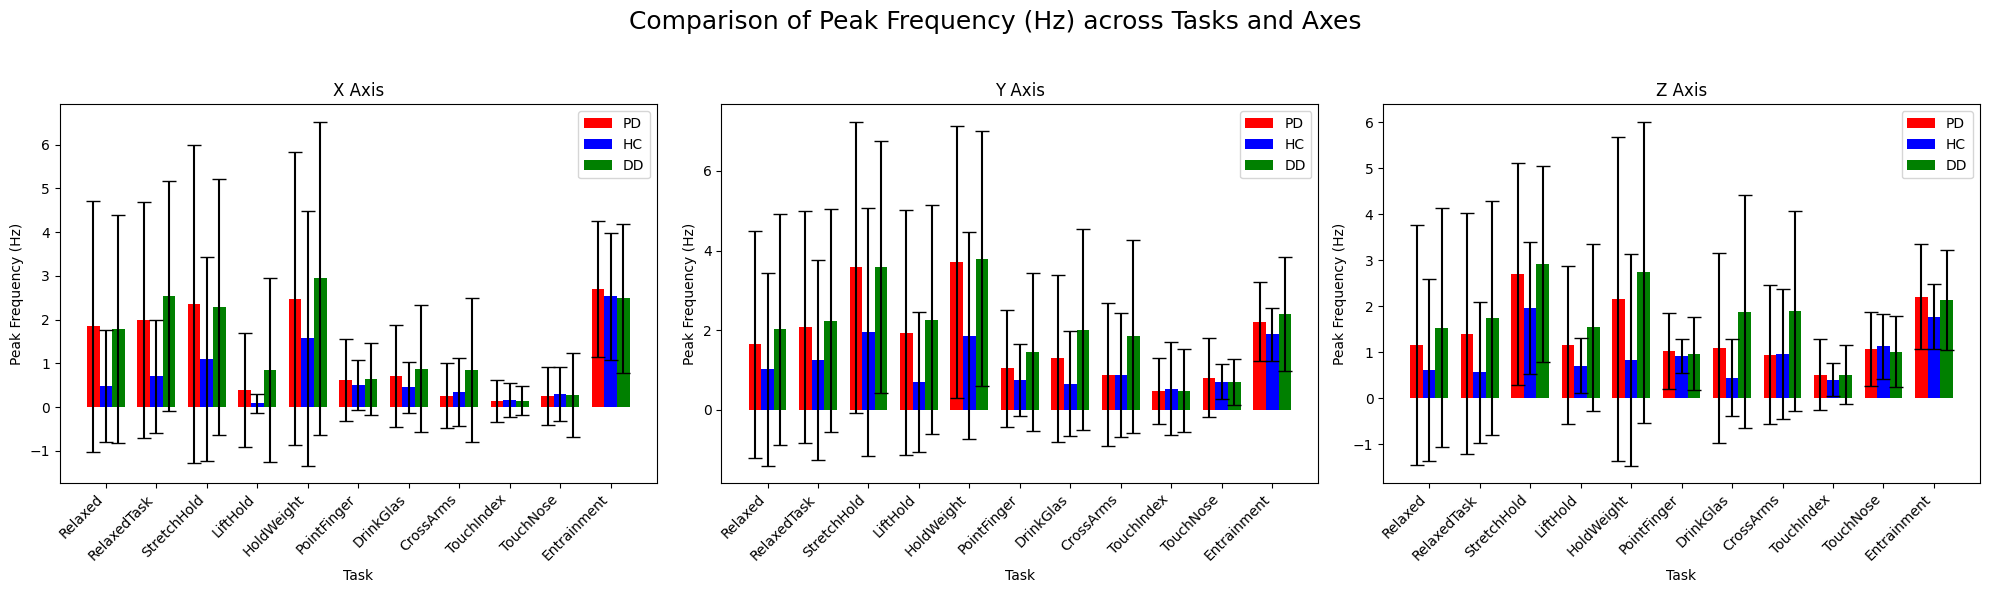

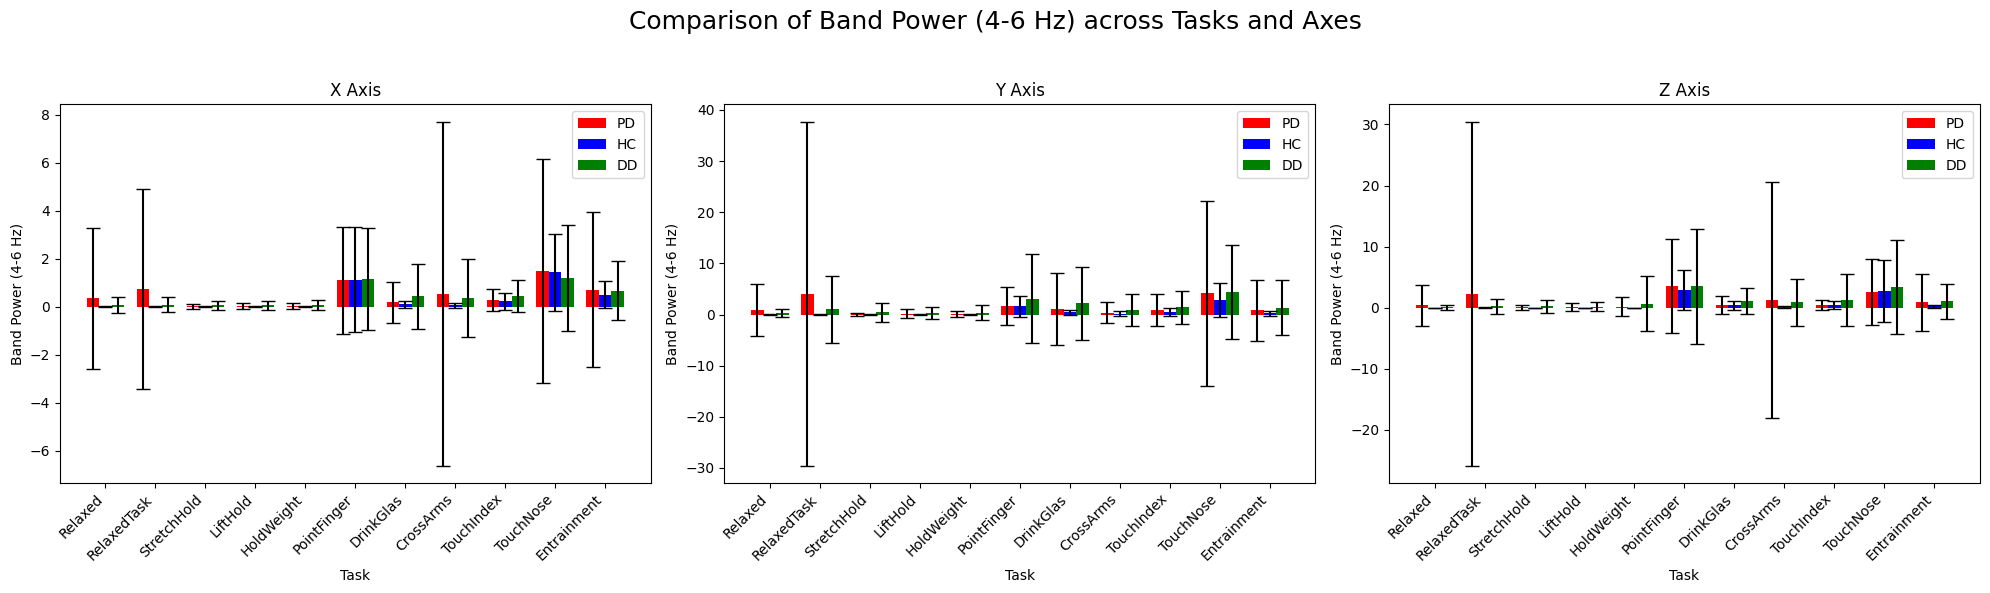

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

fs = 100  # Frecuencia de muestreo en Hz
colors = {"PD": "red", "HC": "blue", "DD": "green"}

# -------------------------------
# Helper Functions
# -------------------------------

def load_sensor_data(filepath, fs=100, skip_seconds=0.5):
    """
    Carga un archivo de datos de sensor (formato CSV sin header) y omite los primeros 'skip_seconds'.
    """
    data = pd.read_csv(filepath, header=None)
    skip_samples = int(fs * skip_seconds)
    data = data.iloc[skip_samples:, :]
    return data

def load_time_series(subject_id, task="Relaxed", wrist="LeftWrist", data_dir="../../data/movement/timeseries/"):
    """
    Carga la serie temporal para un sujeto, tarea y ubicación especificados.
    Se asume que los archivos se nombran como: {subject_id}_{task}_{wrist}.txt
    """
    filename = os.path.join(data_dir, f"{subject_id}_{task}_{wrist}.txt")
    if os.path.exists(filename):
        return load_sensor_data(filename, fs=fs, skip_seconds=0.5)
    else:
        return None

def compute_fft(signal, fs=100):
    """
    Computa el FFT de una señal y retorna el vector de frecuencias y la densidad de potencia (PSD).
    """
    n = len(signal)
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(n, d=1/fs)
    psd = (np.abs(fft_vals) ** 2) / n
    return freqs, psd

def peak_frequency(psd, freqs):
    """Retorna la frecuencia en la que el PSD es máximo."""
    return freqs[np.argmax(psd)]

def band_power(psd, freqs, low, high):
    """Calcula la potencia total en la banda de frecuencia [low, high] Hz."""
    mask = (freqs >= low) & (freqs <= high)
    return np.sum(psd[mask])

# -------------------------------
# Analysis Parameters and Data Structures
# -------------------------------

# Lista de tasks a analizar (según el dataset)
tasks = ["Relaxed", "RelaxedTask", "StretchHold", "LiftHold", "HoldWeight", 
         "PointFinger", "DrinkGlas", "CrossArms", "TouchIndex", "TouchNose", "Entrainment"]

# Definir mapeos de columnas para cada eje del acelerómetro:
# Columna 0: Time, 1: Accelerometer_X, 2: Accelerometer_Y, 3: Accelerometer_Z.
acc_axes = {"X": 1, "Y": 2, "Z": 3}

# Diccionario para almacenar métricas: 
# metrics[task][axis][diagnosis] = lista de diccionarios con métricas para cada sujeto
metrics = {task: {axis: {"PD": [], "HC": [], "DD": []} for axis in ["X", "Y", "Z"]} for task in tasks}

# -------------------------------
# Compute Metrics per Subject, Task, and Axis
# -------------------------------

# df_patients is assumed to exist and contains "subject_id" (string) and "diagnosis" (with values "PD", "HC", "DD")
for idx, row in df_patients.iterrows():
    subject_id = row["subject_id"]
    diagnosis = row["diagnosis"]
    for task in tasks:
        ts_data = load_time_series(subject_id, task=task, wrist="LeftWrist")
        if ts_data is not None:
            for axis in ["X", "Y", "Z"]:
                # Extraer la señal del acelerómetro para el eje actual.
                signal = ts_data.iloc[:, acc_axes[axis]].values
                freqs, psd = compute_fft(signal, fs=fs)
                pk = peak_frequency(psd, freqs)
                bp = band_power(psd, freqs, 4, 6)  # Potencia en la banda 4-6 Hz
                metrics[task][axis][diagnosis].append({
                    "peak_freq": pk,
                    "band_power": bp
                })

# -------------------------------
# Aggregate Metrics: Compute Mean and Std per Task, Axis, and Group
# -------------------------------

summary = {task: {axis: {} for axis in ["X", "Y", "Z"]} for task in tasks}
for task in tasks:
    for axis in ["X", "Y", "Z"]:
        for group in ["PD", "HC", "DD"]:
            data_list = metrics[task][axis][group]
            if data_list:
                peak_freqs = np.array([d["peak_freq"] for d in data_list])
                band_powers = np.array([d["band_power"] for d in data_list])
                summary[task][axis][group] = {
                    "peak_freq_mean": np.mean(peak_freqs),
                    "peak_freq_std": np.std(peak_freqs),
                    "band_power_mean": np.mean(band_powers),
                    "band_power_std": np.std(band_powers),
                    "n": len(data_list)
                }
            else:
                summary[task][axis][group] = None

# -------------------------------
# Output: Print Summary Tables per Task and Axis using tabulate
# -------------------------------
for task in tasks:
    for axis in ["X", "Y", "Z"]:
        print(f"\nTask: {task}, Axis: {axis}")
        table_data = []
        for group in ["PD", "HC", "DD"]:
            if summary[task][axis][group] is not None:
                row_data = summary[task][axis][group]
                table_data.append([group, row_data["n"], 
                                   f'{row_data["peak_freq_mean"]:.2f} ± {row_data["peak_freq_std"]:.2f}',
                                   f'{row_data["band_power_mean"]:.2e} ± {row_data["band_power_std"]:.2e}'])
            else:
                table_data.append([group, 0, "N/A", "N/A", "N/A"])
        print(tabulate(table_data, headers=["Group", "Count", "Peak Freq (Hz)", "Band Power (4-6 Hz)"]))

# Define the metrics to plot: (Label, key for mean, key for std)
metrics_info = {
    "peak_freq": ("Peak Frequency (Hz)", "peak_freq_mean", "peak_freq_std"),
    "band_power": ("Band Power (4-6 Hz)", "band_power_mean", "band_power_std")
}

# For each metric, create one figure with 3 subplots (one for each axis: X, Y, Z)
for metric_key, (metric_label, mean_key, std_key) in metrics_info.items():
    fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=False)
    for i, axis in enumerate(["X", "Y", "Z"]):
        ax = axs[i]
        n_tasks = len(tasks)
        indices = np.arange(n_tasks)
        bar_width = 0.25
        # We'll create grouped bars for PD, HC, and DD
        groups = ["PD", "HC", "DD"]
        for j, group in enumerate(groups):
            means = []
            stds = []
            for task in tasks:
                data = summary[task][axis][group]
                if data is not None:
                    means.append(data[mean_key])
                    stds.append(data[std_key])
                else:
                    means.append(np.nan)
                    stds.append(np.nan)
            # Offset for each group
            offset = (j - 1) * bar_width  # j=0 => -bar_width, j=1 => 0, j=2 => +bar_width
            ax.bar(indices + offset, means, width=bar_width, yerr=stds, capsize=5,
                   label=group, color=colors[group])
        ax.set_title(f"{axis} Axis")
        ax.set_xticks(indices)
        ax.set_xticklabels(tasks, rotation=45, ha="right")
        ax.set_xlabel("Task")
        ax.set_ylabel(metric_label)
        ax.legend(fontsize=10)
    fig.suptitle(f"Comparison of {metric_label} across Tasks and Axes", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
